# Вейвлет-анализ

In [1]:
import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import scipy.fftpack as fft
import scipy.signal as signal
import matplotlib.pyplot as plt

## 1. Оконное преобразование Фурье

### Исходные данные

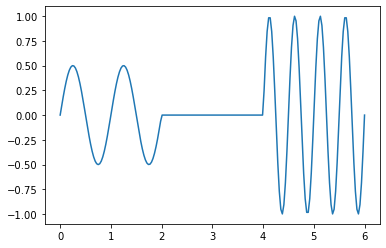

In [2]:
x = np.linspace(0, np.pi * 6, 201)

n = len(x)

L = max(x) - min(x)

y = 0. + 0.5*np.sin(x * 2) 

y[x>np.pi * 2] = 0.

y[x>np.pi * 4] = 1. *np.sin(x [x>np.pi * 4]* 4)

#print (x/(np.pi))

plt.plot(x/np.pi, y)

### Подвижное окно

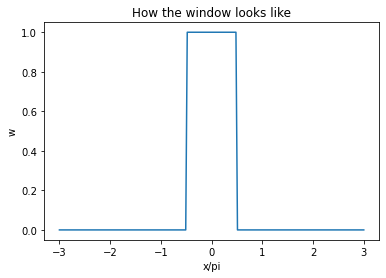

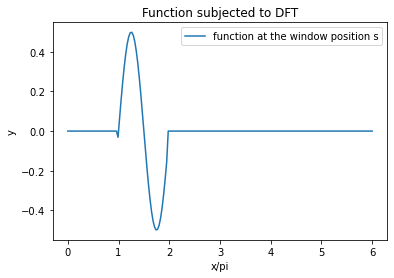

In [3]:
B = np.zeros ((len(x)))

dx = L / (n-1)

xw = np.linspace(-L, L, 2*len(x)-1)

Win = np.zeros ((2*len(x)-1))

WinSize = np.pi/2 # window width

Win[abs(xw)<WinSize] = 1.

plt.figure()
plt.title ('How the window looks like')
plt.xlabel('x/pi')
plt.ylabel('w')
plt.plot (xw [abs(xw)<=3*np.pi] /np.pi , Win [abs(xw)<=3*np.pi])

s = 50 # window position

for i in range (0,n-1):
             
    B[i] = y[i] * Win[i-s+n]                        
       
plt.figure ()
plt.title ('Function subjected to DFT')
plt.xlabel('x/pi')
plt.ylabel('y')
plt.plot (x/np.pi, B, label='function at the window position s')
plt.legend()


### Оконное преобразование Фурье

(201,) (201,) (15, 201)


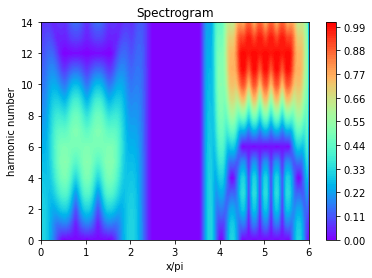

In [4]:
nf = 15 # number of harmonics taking into account

a2 = np.zeros((n,nf))
b2 = np.zeros((n,nf))
A2 = np.zeros((n,nf))

Freq = np.zeros ((len(x)))
Shift = np.zeros ((len(x)))

CosTerm = np.zeros ((len(x)))
SinTerm = np.zeros ((len(x)))

for k in range (0,nf):
    
    Freq [k] = k

    for s in range (0,n-1):
        
        Shift[s] = s
    
        a2[s,k]=0.
        b2[s,k]=0.
       
        for i in range (0,n-1):
    
            a2[s,k] +=  2./ WinSize /2 * y[i] * Win[i-s+n] * np.cos(2*np.pi*x[i]/L * k) * dx 
            b2[s,k] +=  2./ WinSize /2 * y[i] * Win[i-s+n] * np.sin(2*np.pi*x[i]/L * k) * dx
        
                                   
A2 = (a2**2+b2**2)**0.5 

print (x.shape, Freq.shape, A2.T.shape)

plt.figure()
plt.title ('Spectrogram')
plt. xlabel ('x/pi')
plt. ylabel ('harmonic number')
plt.contourf(x/np.pi, Freq[0:nf], A2.T, 100, cmap='rainbow')
plt.colorbar()

## 2. Дисретное вейвлет-преобразование

In [5]:
def BasicFunctionsWavelet (nj, x):
    
    # formation of wavelet basis    
    # nj - number of scale levels
    
    n = len(x) 
    
    x_left = x[0]; x_right = x[n-1]
    
    nf = 0
    
    for j in range (0, nj):
        nk = 2**j
        nf = nf + nk
    
       
    L = x_right - x_left

    PhiFunArray = np.zeros((n, nf+1))
    
    #print (PhiFunArray.shape)
                   
    PhiFunArray[:,nf] = 1.
    
    jk = -1
    
    for j in range (0, nj):
        nk = 2**j
        for k in range (0, nk):
            jk = jk+1
            for i in range(0,n):
                PhiFunArray[i,jk] = BFW (x[i], j, k, x_left, x_right)            
    return PhiFunArray

def BFW (xi, j, k, x_left, x_right):
    # dilation (j) and translation (k) of wavelet functions
    L = x_right - x_left
    Phijk=2.**(j/2)*WaveletHaar (2**j*(xi-x_left)/L-k)
    return Phijk
    
def WaveletHaar(x):
    x_left = 0.; L=1
    W = 0.
    if (x>=x_left and x<x_left+L/2):
        W = 1.
    if (x>=x_left+L/2 and x<=x_left+L):
        W = -1
    return W

def WaveletMexh(x):
    # just for example, not for applying to DWT
    xm = 0.5
    y = (x-xm) * 1. #(x_right-x_left)/2
    W = np.exp(-0.5*y**2)-y**2*np.exp(-0.5*y**2)
    return W

### Базисные функции

(1001, 32)
(1001, 5, 16)


<Figure size 432x288 with 0 Axes>

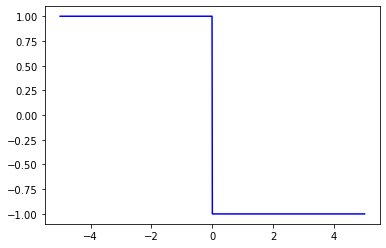

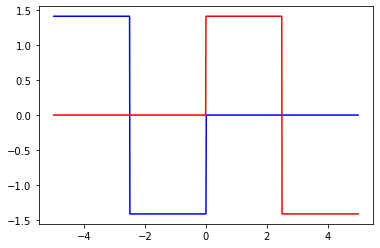

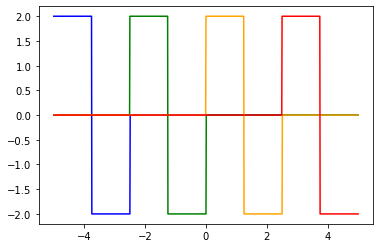

<Figure size 432x288 with 0 Axes>

In [6]:
x_left = -5. #-5
x_right = 5. #5

L = x_right - x_left

x = np.linspace(x_left, x_right, 1001)
n = len(x)

nj = 5
nk = 2**(nj-1)

Phi = np.zeros((n, nj, nk))

for j in range (0, nj):
    nk =  2**j #int (2**j-1)+1
    for k in range (0, nk):
        for i in range(0,n):
            Phi[i,j,k] = BFW (x[i], j, k, x_left, x_right)

BF = BasicFunctionsWavelet (nj, x)

print (BF.shape)
print (Phi.shape)

plt.plot (x, BF[:,0], 'b')

plt.figure ()

plt.plot (x, BF[:,1], 'b')
plt.plot (x, BF[:,2],'r')

plt.figure ()          
plt.plot (x, BF[:,3], 'b')
plt.plot (x, BF[:,4],'g')
plt.plot (x, BF[:,5],'orange')
plt.plot (x, BF[:,6],'r')

plt.figure()

#plt.plot (x, BF[:,3])

### Прямое и обратное вейвлет - преобразование. Кратномасштабный анализ.

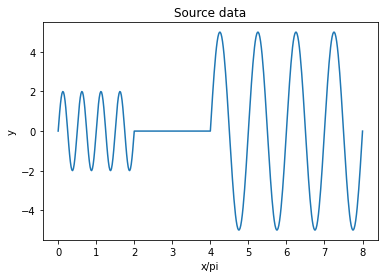

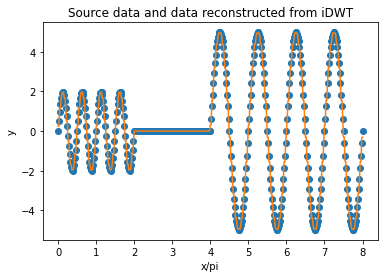

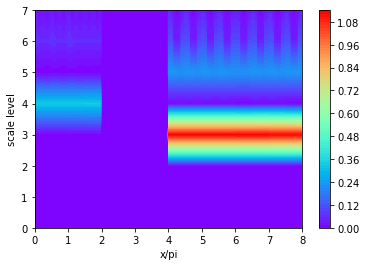

In [7]:
x_left = 0; x_right = np.pi * 8

x = np.linspace(0, np.pi * 8, 401)
#x = np.linspace(-2, 2, 101)

n = len(x)

L = max(x) - min(x)

y = 0. + 2*np.sin(x * 4) #+ 2.*np.sin(x * 4 ) #+ np.sin(x * 25.5)

y[x>np.pi * 2] = 0.

y[x>np.pi * 4] = 5. *np.sin(x [x>np.pi * 4]* 2)

plt.title ('Source data') 
plt.xlabel ('x/pi')
plt.ylabel ('y')
plt.plot(x/np.pi, y)

plt.figure ()

nj = 8 # number of scale levels

# direct transformation

Phi = BasicFunctionsWavelet (nj, x)
   
PhiT = Phi.T
G = PhiT @ Phi 
z = PhiT @ y
a = np.linalg.solve(G, z)

# inverse transformation
   
w = Phi@a

# scaleogramm

jk = -1

Nk = 2**(nj-1)

Cw = np.zeros((nj, Nk))

Cf = np.zeros((n, nj))

Lscale = np.zeros(nj)
Ltrans = np.zeros(Nk)

for k in range (0, Nk):
    Ltrans[k] = k

for j in range (0, nj):
    Lscale[j] = j
    nk = 2**j
    
    for k in range (0, nk):
        jk = jk+1
        Cw[j,k] = a[jk]
        for i in range (0,n):
            if (x[i]>=x_left+k*L/2**j and x[i]<x_left+(k+1)*L/2**j):
                Cf[i,j] = a[jk]
                
plt.title ('Source data and data reconstructed from iDWT') 
plt.xlabel ('x/pi')
plt.ylabel ('y')
plt.plot (x/np.pi,y, 'o')
plt.plot (x/np.pi,w)

#print (Ltrans.shape, Lscale.shape, Cw.T.shape)
#print (Cw)


plt.figure()
plt.xlabel ('x/pi')
plt.ylabel ('scale level')
plt.contourf(x/np.pi, Lscale, abs(Cf.T), 100, cmap='rainbow')
plt.colorbar()

In [15]:
Cf

array([[-5.38889097e-03, -4.15916850e-03, -1.88960648e-03, ...,
        -5.66156810e-03, -6.94608884e-02, -4.05530553e-02],
       [-5.38889097e-03, -4.15916850e-03, -1.88960648e-03, ...,
        -5.66156810e-03, -6.94608884e-02, -4.05530553e-02],
       [-5.38889097e-03, -4.15916850e-03, -1.88960648e-03, ...,
        -5.66156810e-03, -6.94608884e-02, -4.05530553e-02],
       ...,
       [-5.38889097e-03, -3.46187419e-03, -2.02507621e-16, ...,
        -2.31722267e-01, -1.16694690e-01, -5.43015147e-02],
       [-5.38889097e-03, -3.46187419e-03, -2.02507621e-16, ...,
        -2.31722267e-01, -1.16694690e-01, -5.43015147e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [12]:
Lscale

array([0., 1., 2., 3., 4., 5., 6., 7.])

### Дискретные и непрерывные вейвлеты pywt

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

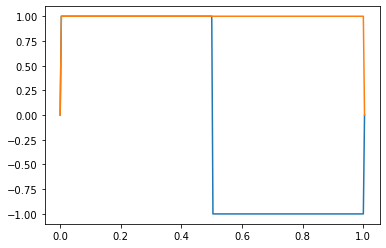

In [8]:
import pywt
print(pywt.wavelist())
#w = pywt.ContinuousWavelet('mexh')
w = pywt.Wavelet('db1')
print(w.orthogonal)
(phi, psi, x) = w.wavefun()
#(psi, x) = w.wavefun()
plt.plot (x, psi)
plt.plot (x, phi)
#print (psi@phi)

### Дискретное вейвлет-преобразование pywt

In [9]:
from pywt import wavedec
coeffs = wavedec([1,2,3,4,5,6,7,8], 'db1', level=3) # db1 - Haar wavelet

cA2, cD2, cD1, cD0 = coeffs

print (cA2)
print (cD2)
print (cD1)
print (cD0)

[12.72792206]
[-5.65685425]
[-2. -2.]
[-0.70710678 -0.70710678 -0.70710678 -0.70710678]


### Дискретное вейвлет-преобразование своими силами

4.5
-2.0
-0.7071067811865475 -0.7071067811865474
[-0.25 -0.25 -0.25 -0.25]
note that ratio of coefficients is the same as in pywt


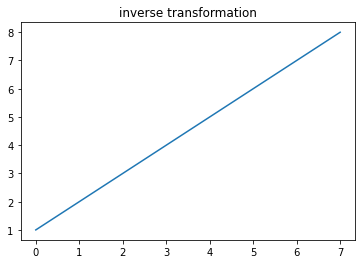

In [10]:
nj = 3

#x = [1,2,3,4,5,6,7,8]
x = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

y = [1,2,3,4,5,6,7,8]

Phi = BasicFunctionsWavelet (nj, x)
   
PhiT = Phi.T
G = PhiT @ Phi 
z = PhiT @ y
a = np.linalg.solve(G, z)

print (a[-1])
print (a[0])
print (a[1], a[2])
print (a[3:7])
print ('note that ratio of coefficients is the same as in pywt')

w = Phi@a

plt.title ('inverse transformation')
plt.plot (w)